# Activity 3.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [43]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [13]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


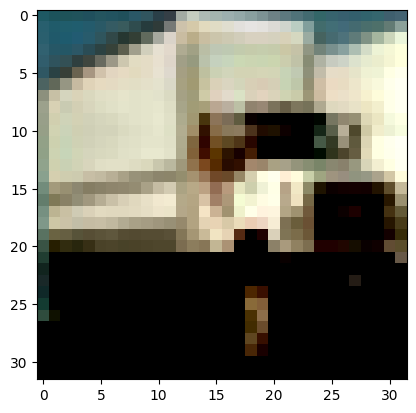

In [14]:
print(y_train[444])
plt.imshow(x_train[444]);

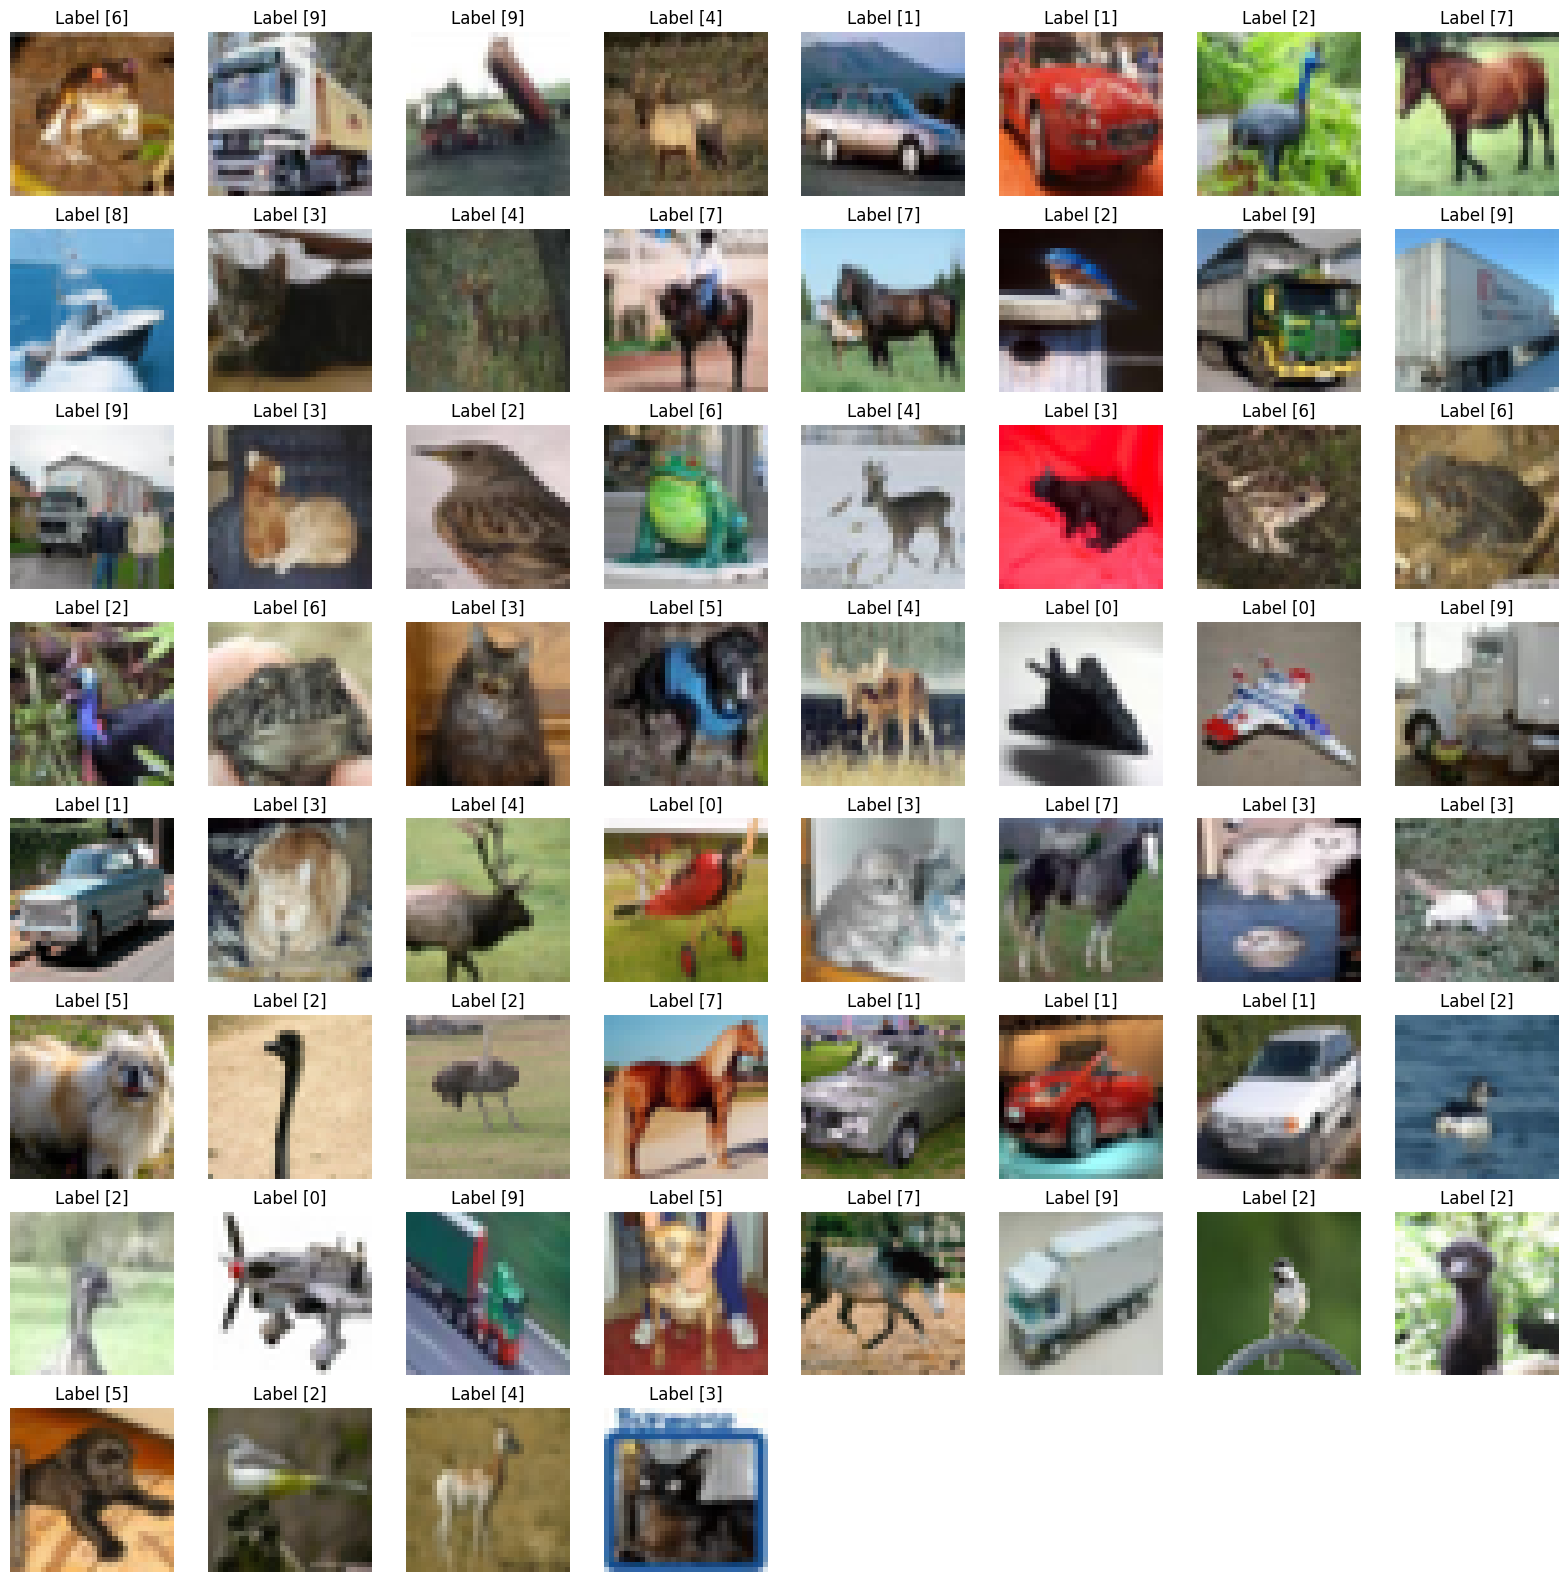

In [44]:
plt.figure(figsize=(20,20))
for i in range (60):
  plt.subplot(8,8, i+ 1)
  plt.imshow(x_train[i])
  plt.title(f'Label {y_train[i]}')
  plt.axis('off')
plt.show()

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2949 - loss: 1.9090 - val_accuracy: 0.4555 - val_loss: 1.4818
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4620 - loss: 1.4793 - val_accuracy: 0.5184 - val_loss: 1.3205
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5163 - loss: 1.3492 - val_accuracy: 0.5632 - val_loss: 1.2136
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5426 - loss: 1.2894 - val_accuracy: 0.5732 - val_loss: 1.2053
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.5650 - loss: 1.2298 - val_accuracy: 0.6055 - val_loss: 1.1337
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.5784 - loss: 1.1910 - val_accuracy: 0.6193 - val_loss: 1.0991
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5931 - loss: 1.1523 - val_accuracy: 0.6176 - val_loss: 1.1033
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6032 -

#### <font size= 6>Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
from keras.datasets import cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 134s 1us/step


In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
import numpy as np

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#I will modify my data which is suitable for image classification
mean = np.mean(x_train)
std = np.mean(x_train)

x_train = (x_train - mean) / (std + 1e-8)
x_test = (x_test - mean) / (std + 1e-8)

In [6]:
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

In [24]:
regulizer_lr = 0.0001

input = Input((32,32,3), name = 'Inputlayer')

#I will Implment pyramid strat
X = Conv2D(32, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_1')(input)
X = Conv2D(32, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_2')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.2)(X)

X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_3')(X)
X = Conv2D(64, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_4')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.3)(X)

X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_5')(X)
X = Conv2D(128, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_6')(X)
X = BatchNormalization()(X)
X = MaxPooling2D(pool_size=(2,2))(X)
X = Dropout(0.4)(X)

X = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_7')(X)
X = Conv2D(256, (3,3), strides = (1,1), padding = 'same', kernel_regularizer=l2(regulizer_lr), activation = 'relu', name = 'con_layer_8')(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)


X = Flatten()(X)
X = Dropout(0.5)(X)
output = Dense(10, activation = 'softmax', name = 'outputlayer')(X)

In [25]:
my_cfar10model = Model(inputs= input, outputs = output, name ='MYCFARMODEL')
my_cfar10model.compile(optimizer = Adam(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# create the other regulizer
checkpoint = EarlyStopping(monitor = 'val_loss', patience = 21, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor = 'val_loss', factor=0.5, min_lr=1e-7, patience = 7)

In [26]:
my_cfar10model.summary()

Model: "MYCFARMODEL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (InputLayer)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_1 (Conv2D)            │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_2 (Conv2D)            │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_3 (Conv2D)            │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_4 (Conv2D)            │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_5 (Conv2D)            │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_6 (Conv2D)            │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_7 (Conv2D)            │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con_layer_8 (Conv2D)            │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │        40,97

 Total params: 1,215,146 (4.64 MB)

 Trainable params: 1,214,186 (4.63 MB)

 Non-trainable params: 960 (3.75 KB)

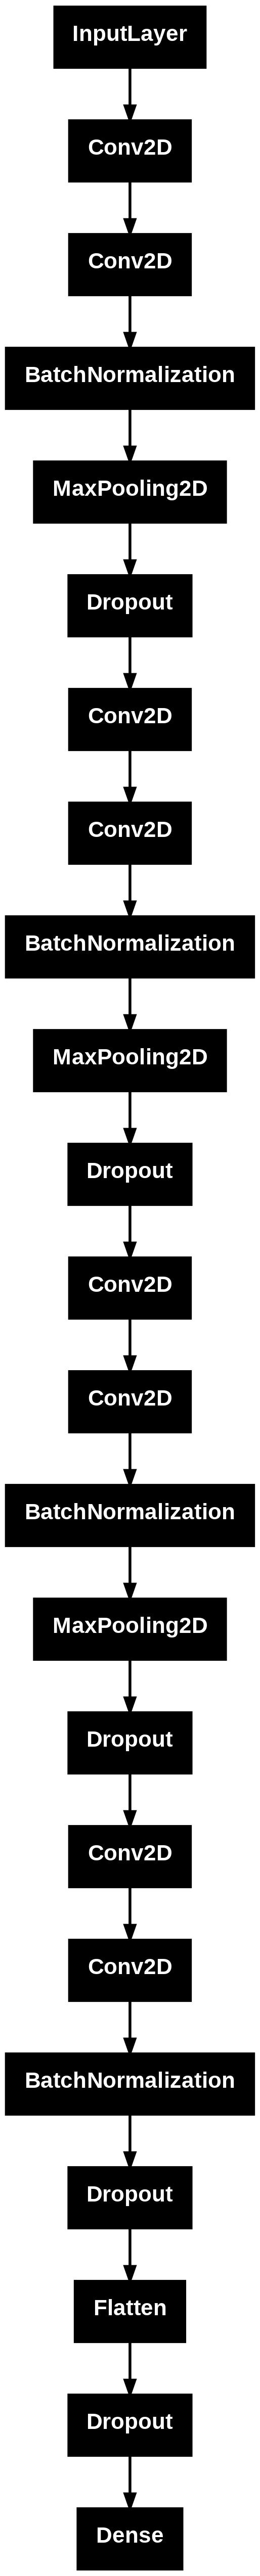

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(my_cfar10model)

In [12]:
# trainingpart
model_hist = my_cfar10model.fit(x_train,y_train, epochs=5, batch_size=128, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.2565 - loss: 3.0126 - val_accuracy: 0.2008 - val_loss: 2.9875 - learning_rate: 5.0000e-04
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.4432 - loss: 1.7605 - val_accuracy: 0.4616 - val_loss: 1.6797 - learning_rate: 5.0000e-04
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5106 - loss: 1.6064 - val_accuracy: 0.6019 - val_loss: 1.2691 - learning_rate: 5.0000e-04
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5830 - loss: 1.3881 - val_accuracy: 0.6157 - val_loss: 1.1773 - learning_rate: 5.0000e-04
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6213 - loss: 1.2865 - val_accuracy: 0.6375 - val_loss: 1.2605 - learning_rate: 5.0000e-04


<font size =5><b>Observation</b></font>

- When I train my model for just 5 epoch it is able to achieve a higher accuract in validation set compare to training set I think I will continue training my model

In [17]:
# trainingpart 128 epochs
model_hist1 = my_cfar10model.fit(x_train,y_train, epochs=64, batch_size=64, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.5813 - loss: 1.4389 - val_accuracy: 0.6393 - val_loss: 1.1428 - learning_rate: 5.0000e-04
Epoch 2/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6509 - loss: 1.1623 - val_accuracy: 0.7045 - val_loss: 0.9584 - learning_rate: 5.0000e-04
Epoch 3/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6840 - loss: 1.0553 - val_accuracy: 0.7323 - val_loss: 0.8945 - learning_rate: 5.0000e-04
Epoch 4/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7189 - loss: 0.9501 - val_accuracy: 0.7402 - val_loss: 0.8705 - learning_rate: 5.0000e-04
Epoch 5/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7322 - loss: 0.9033 - val_accuracy: 0.7690 - val_loss: 0.8151 - learning_rate: 5.0000e-04
Epoch 6/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7505 - loss: 0.8621 - val_accuracy: 0.7523 - val_loss: 0.8488 - learning_rate: 5.0000e-04
Epoch 7/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - ac

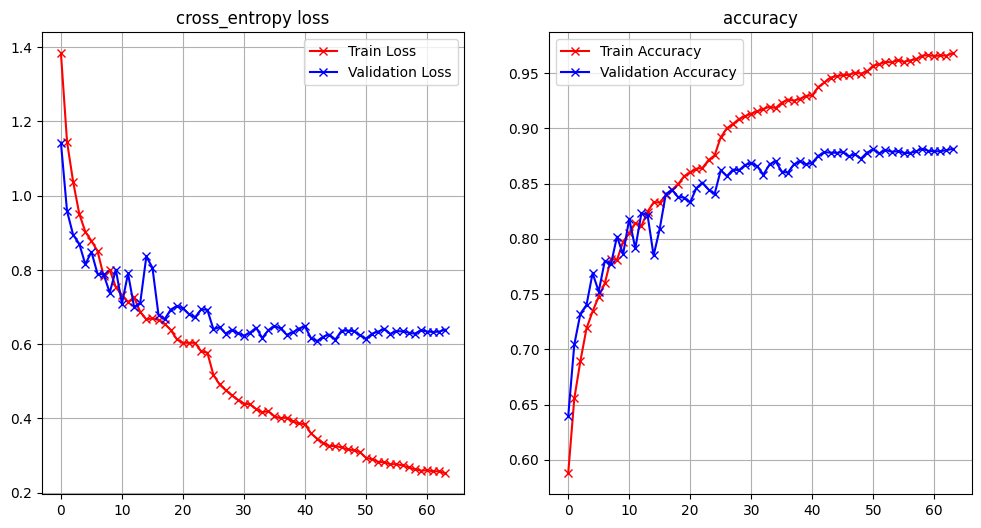

In [18]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(model_hist1)

<b>Observation</b>
- It overfits, what if I add datagenerator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [27]:
# trainingpart 128 epochs
model_hist2 = my_cfar10model.fit(datagen.flow(x_train,y_train, batch_size=64), epochs=64, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.2423 - loss: 3.0475 - val_accuracy: 0.4125 - val_loss: 1.9133 - learning_rate: 5.0000e-04
Epoch 2/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.3980 - loss: 1.9605 - val_accuracy: 0.5127 - val_loss: 1.4785 - learning_rate: 5.0000e-04
Epoch 3/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4556 - loss: 1.7781 - val_accuracy: 0.4962 - val_loss: 1.5588 - learning_rate: 5.0000e-04
Epoch 4/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5053 - loss: 1.5794 - val_accuracy: 0.5854 - val_loss: 1.3539 - learning_rate: 5.0000e-04
Epoch 5/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5567 - loss: 1.4385 - val_accuracy: 0.5795 - val_loss: 1.3300 - learning_rate: 5.0000e-04
Epoch 6/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5956 - loss: 1.3014 - val_accuracy: 0.5911 - val_loss: 1.2868 - learning_rate: 5.0000e-04
Epoch 7/64
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/ste

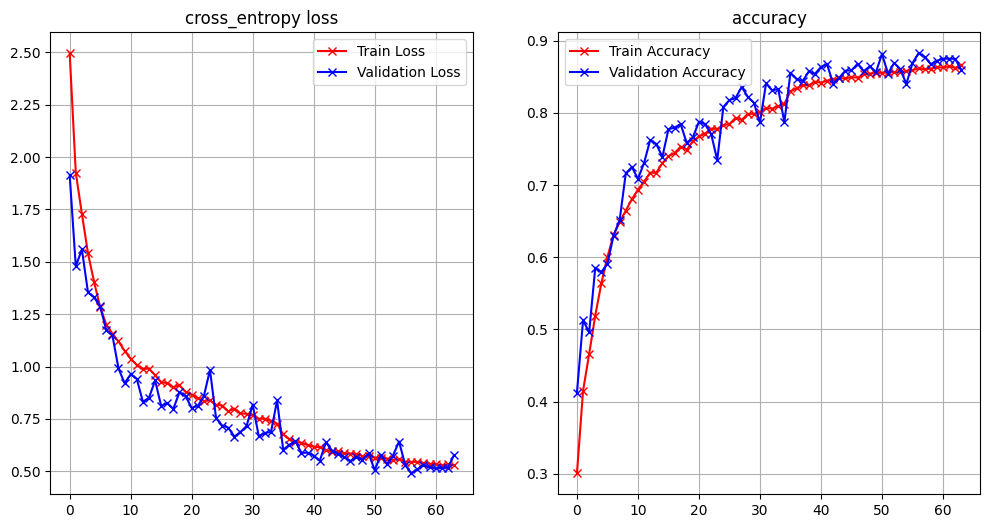

In [28]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(model_hist2)

<b>Observation</b>
- Even if I add data generator, the accuracy of the model remains the same. However we are able to mitigate the problem regarding the overfitting of the model. I think this happens due to the deepness of the layer where the final output doesnt resembles the main subject anymore or matches to the meaning of vanishing gradient, which is harder for our model to analyze. I think I will implement residual blocks.

<b>Creating my own residual block (resNet)

Also I learned that when we are training this is the standard for layering CNN:
conv_layer -> BatchNormalization -> Activation function (relu)

In [29]:
from tensorflow.keras.layers import Activation, Add, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
def residual_block(X, filter,lr_weights, downsample = False):

  # let's save the original input
  shortcut = X
  stride = 2 if downsample else 1
  # instead of maxpooling when we are implementing resnet
  # we have to implement strides of 2 and kernel size of 1
  if downsample:
    shortcut = Conv2D(filter, kernel_size = 1, strides=2, padding='same',kernel_regularizer=l2(lr_weights), use_bias=False)(shortcut)
    shortcut = BatchNormalization()(shortcut)
    # this will reduce the shape of the output of the image by 2 so if 32x32 -> 16x16

  # so this is our MAINPATH
  # where we implement the normal 2 layers patern of our convolutional layer
  X = Conv2D(filter, kernel_size= 3, padding = 'same', kernel_regularizer=l2(lr_weights), use_bias=False, strides=stride)(X)
  # since our shortcut path reduce the image shape by 2 we also need to reduce it in the main path, inorder for the shape to be
  # match when the combining time happens

  #  (intial shape 32x32)
  # [Inputlayer]    ->     [Main path (32x32 must -> 16x16)]- -> [(16x16) size in both]
  #    | - - - - - - - - [short cut layer(32x32 -> 16x16)] - - - -  - - - - |

  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(filter, 3, padding = 'same', kernel_regularizer=l2(lr_weights), use_bias=False)(X)
  X = BatchNormalization()(X)

  # Adding the shortcut
  X = Add()([shortcut, X])
  X = Activation('relu')(X)

  return X





In [31]:
# lets now apply the own resnet in the new model
learning_rate = 0.0001

input = Input((32,32,3), name = 'Inputlayer')

X = Conv2D(32, 3, padding = 'same', use_bias=False, kernel_regularizer=l2(learning_rate), name = 'CNNL1')(input)
X = BatchNormalization()(X)
X = Activation('relu')(X)
# now that we have the first input layer we will do the residual block
X = residual_block(X, 32, learning_rate)
X = residual_block(X, 32, learning_rate)

# shifting the filtersize -> 128

X = residual_block(X, 64, learning_rate, True)
X = residual_block(X, 64, learning_rate)

# shifting the filtersize -> 256

X = residual_block(X, 128, learning_rate, True)
X = residual_block(X, 128, learning_rate)

# Transition to fully connected layers
X = GlobalAveragePooling2D()(X)
X = Dropout(0.5)(X)

# The full connected Layers
X = Dense(128, activation ='relu', name = 'Layer1')(X)
X = Dropout(0.5)(X)

output = Dense(10, activation= 'softmax', name ='outputlayer')(X)

resnetmodel = Model(inputs = input, outputs = output, name ='resnetmodel')
resnetmodel.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [32]:
resnetmodel.summary()

Model: "resnetmodel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Inputlayer          │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CNNL1 (Conv2D)      │ (None, 32, 32,    │        864 │ Inputlayer[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ CNNL1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      9,216 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ activation[0][0], │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      9,216 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      9,216 │ activation_3[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ activation_2[0][

 Total params: 715,370 (2.73 MB)

 Trainable params: 713,130 (2.72 MB)

 Non-trainable params: 2,240 (8.75 KB)

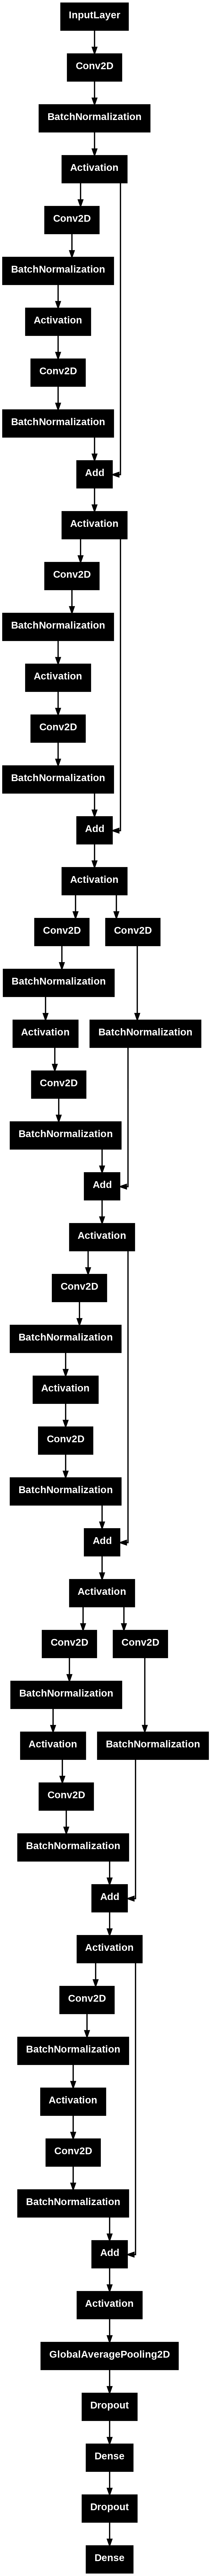

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(resnetmodel)

In [34]:
# create the other regulizer
checkpoint = EarlyStopping(monitor = 'val_loss', patience = 21, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor = 'val_loss', factor=0.5, min_lr=1e-7, patience = 7)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [ ]:
resnet_hist = resnetmodel.fit(datagen.flow(x_train,y_train,batch_size=64), epochs=128, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/128


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 52ms/step - accuracy: 0.8198 - loss: 0.8257 - val_accuracy: 0.8474 - val_loss: 0.6957 - learning_rate: 5.0000e-04
Epoch 2/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8424 - loss: 0.7184 - val_accuracy: 0.8400 - val_loss: 0.7051 - learning_rate: 5.0000e-04
Epoch 3/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.8507 - loss: 0.6917 - val_accuracy: 0.8500 - val_loss: 0.6623 - learning_rate: 5.0000e-04
Epoch 4/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8573 - loss: 0.6624 - val_accuracy: 0.8235 - val_loss: 0.7686 - learning_rate: 5.0000e-04
Epoch 5/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8585 - loss: 0.6503 - val_accuracy: 0.8509 - val_loss: 0.6531 - learning_rate: 5.0000e-04
Epoch 6/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8628 - loss: 0.6295 - val_accuracy: 0.8173 - val_loss: 0.7901 - learning_rate: 5.0000e-04
Epoch 7/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - a

In [35]:
resnet_hist = resnetmodel.fit(datagen.flow(x_train,y_train,batch_size=64), epochs=128, callbacks=[reduceLR, checkpoint], validation_data=(x_test,y_test))

Epoch 1/128


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.2473 - loss: 2.1523 - val_accuracy: 0.3102 - val_loss: 2.1096 - learning_rate: 0.0010
Epoch 2/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.4623 - loss: 1.5665 - val_accuracy: 0.3986 - val_loss: 2.0396 - learning_rate: 0.0010
Epoch 3/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.5710 - loss: 1.3251 - val_accuracy: 0.6259 - val_loss: 1.1264 - learning_rate: 0.0010
Epoch 4/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6230 - loss: 1.2037 - val_accuracy: 0.5844 - val_loss: 1.3770 - learning_rate: 0.0010
Epoch 5/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6712 - loss: 1.0965 - val_accuracy: 0.6587 - val_loss: 1.1244 - learning_rate: 0.0010
Epoch 6/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7064 - loss: 1.0196 - val_accuracy: 0.7397 - val_loss: 0.9105 - learning_rate: 0.0010
Epoch 7/128
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7337 - loss: 

<b>Lets check the graph of our model

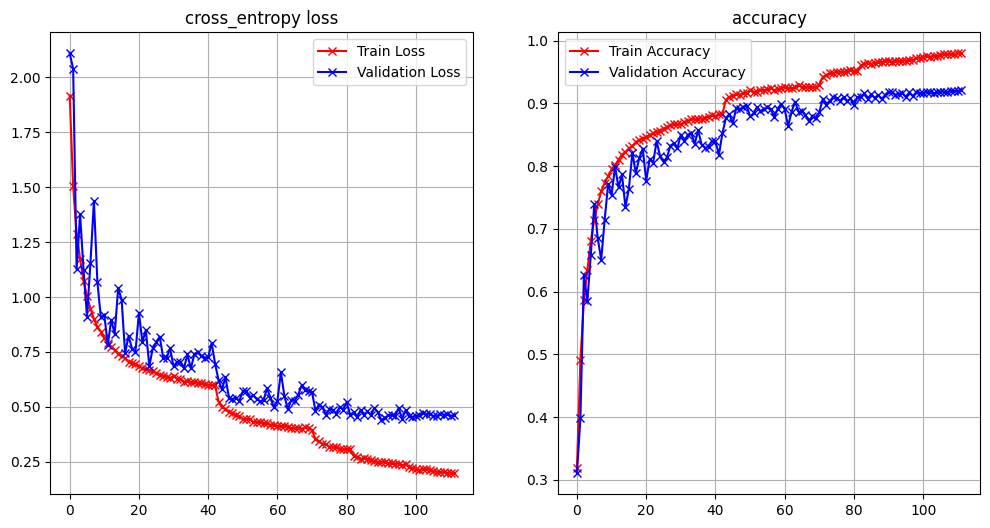

In [36]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(resnet_hist)

<b> Observation
- Based on the result of the graph we are able to obtain a greater than 90% validation accuracy in the cifar10 dataset by using the residual blocks.

In [37]:
# Now that we have the model lets check it accuracy accross different class using
# classification report
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
y_pred_proba = resnetmodel.predict(x_test)

y_pred = np.argmax(y_pred_proba, axis = 1)
y_test_set = np.argmax(y_test, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [39]:
print(classification_report(y_test_set,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.95      0.97      0.96      1000
           2       0.93      0.86      0.90      1000
           3       0.81      0.84      0.82      1000
           4       0.93      0.93      0.93      1000
           5       0.91      0.83      0.87      1000
           6       0.91      0.97      0.94      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.95      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<b>Fortunately we are able to obtain a 92% accuracy in test set

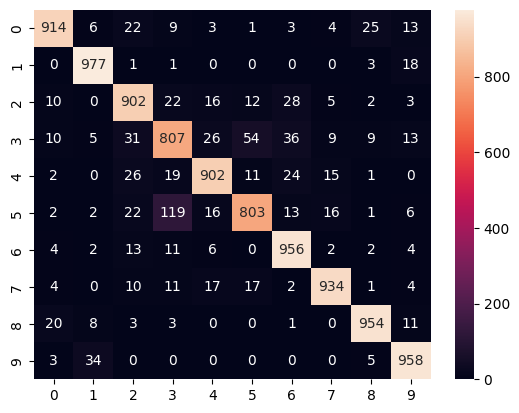

In [ ]:
import seaborn as sns

confusion_mat = confusion_matrix(y_test_set,y_pred)

sns.heatmap(confusion_mat, fmt= '.3g', annot = True)
plt.show()

<b>Observation</b>
- Based on the result of the confusion matrix and the classification report, we can see that our model was having difficulty the analyzing the difference between the dog and the cat class. While Observing the picture even me do having difficulty in determing the difference between the two due to their almost same structure and quality on the image. While the rest of the class are easy to define.

In [40]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

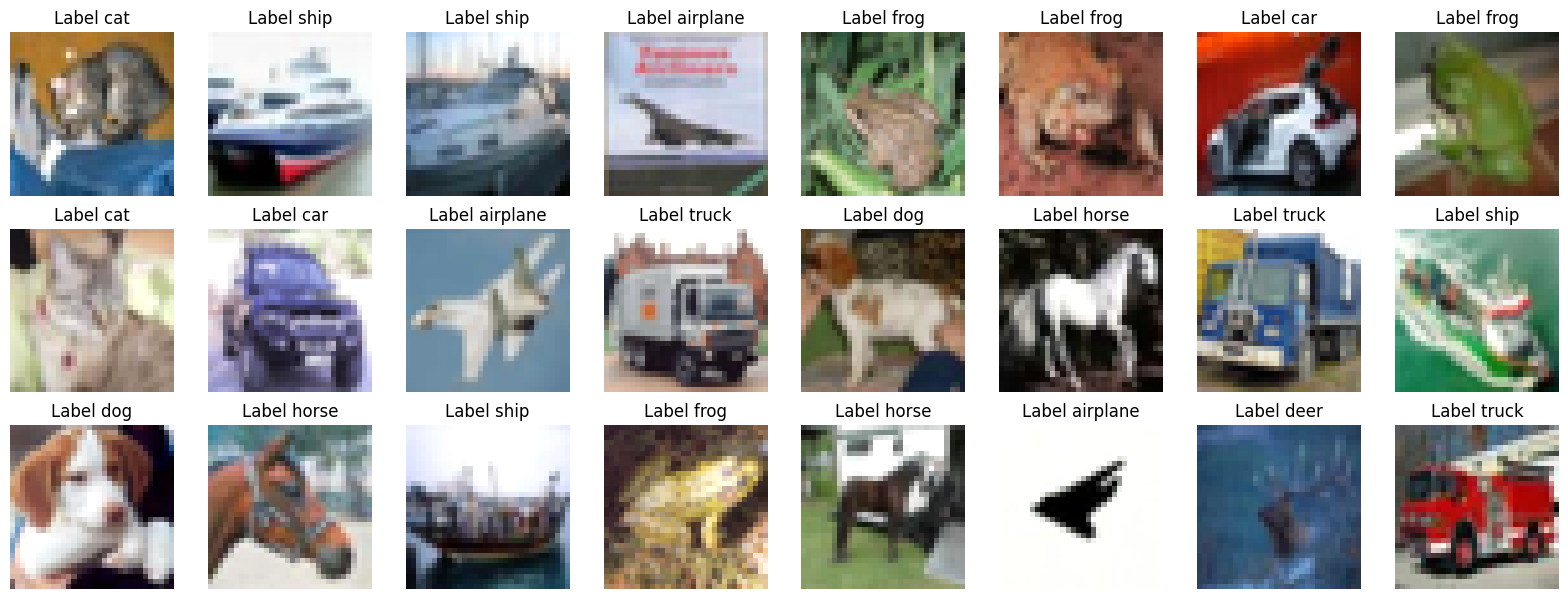

In [41]:
# lets see how really accurate our model

# name the classes
classes = {
    0 :'airplane',
    1 :'car',
    2 :'bird',
    3 :'cat',
    4 :'deer',
    5 :'dog',
    6 :'frog',
    7 :'horse',
    8 :'ship',
    9 :'truck',
}

plt.figure(figsize=(20,20))
for i in range(24):
  plt.subplot(8,8, i + 1)
  img = (x_test[i] + 1) / 2
  plt.imshow(img)
  plt.title(f'Label {classes[y_pred[i]]}')
  plt.axis('off')

plt.show()



In [42]:
# save the model for website creating
resnetmodel.save("ann_model.keras")

# <font size = 6><b>Conclusion

- After completing the activity, I was able to learn the basic fundamentals of the Convonlution Neural Networks. Where I was able to learn how it works from the convolutional layer, pooling layer, up until fully connected layer which is composed of ANN model that will analyze the flatten data from the convolution layer. While following the procedure I was able to learn how to configure my first CNN model strating from loading the dataset up to training part. Furthermore, I realized that even if we have rich number of data in our hands, without proper regularization and applying augmentation in the dataset our model will still under perform into unseen data. Lastly, when it comes to building the model I realized the drawbacks of having deep network which always results to the vanishing gradient. Because of that, I advance study the concept of residual blocks or what we call the resnet which is very useful against vanishing gradient problem in CNN because it retains the signal of the input by having shortcuts while having deep layers. Overall, I really enjoy the activity where I able to create my own ResNet 14 model that was able to reach a 92% accuracy in test set which is still a basic for this dataset.